In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

import requests as requests
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | clyde river
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | luoyang
Processing Record 5 of Set 1 | sakakah
Processing Record 6 of Set 1 | orem
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | dryden
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | mitsamiouli
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | fort nelson
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | srednekolymsk
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | roma
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | taviano
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 23 of Set 1 |

Processing Record 35 of Set 4 | carutapera
Processing Record 36 of Set 4 | lokosovo
Processing Record 37 of Set 4 | namatanai
Processing Record 38 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 39 of Set 4 | siderno
Processing Record 40 of Set 4 | kidal
Processing Record 41 of Set 4 | mahebourg
Processing Record 42 of Set 4 | hamilton
Processing Record 43 of Set 4 | iracemapolis
Processing Record 44 of Set 4 | narsaq
Processing Record 45 of Set 4 | utiroa
City not found. Skipping...
Processing Record 46 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 47 of Set 4 | taltal
Processing Record 48 of Set 4 | cherskiy
Processing Record 49 of Set 4 | deputatskiy
Processing Record 50 of Set 4 | zhangjiakou
Processing Record 1 of Set 5 | karratha
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | kikwit
Processing Record 4 of Set 5 | waingapu
Processing Record 5 of Set 5 | ornskoldsvik
Processing Record 6 of Set 5 | kenitra
Processing Record 7

Processing Record 27 of Set 8 | port-gentil
Processing Record 28 of Set 8 | altos
Processing Record 29 of Set 8 | victoria
Processing Record 30 of Set 8 | worland
Processing Record 31 of Set 8 | borama
City not found. Skipping...
Processing Record 32 of Set 8 | san carlos
Processing Record 33 of Set 8 | meulaboh
Processing Record 34 of Set 8 | margate
Processing Record 35 of Set 8 | po
City not found. Skipping...
Processing Record 36 of Set 8 | yumen
Processing Record 37 of Set 8 | mirabad
Processing Record 38 of Set 8 | whitianga
Processing Record 39 of Set 8 | guerrero negro
Processing Record 40 of Set 8 | westerland
Processing Record 41 of Set 8 | endicott
Processing Record 42 of Set 8 | namibe
Processing Record 43 of Set 8 | waitati
Processing Record 44 of Set 8 | mastic beach
Processing Record 45 of Set 8 | wanning
Processing Record 46 of Set 8 | maceio
Processing Record 47 of Set 8 | areni
Processing Record 48 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing 

Processing Record 14 of Set 12 | guarapari
Processing Record 15 of Set 12 | manokwari
Processing Record 16 of Set 12 | pangnirtung
Processing Record 17 of Set 12 | igarape-miri
City not found. Skipping...
Processing Record 18 of Set 12 | caiaponia
Processing Record 19 of Set 12 | candawaga
City not found. Skipping...
Processing Record 20 of Set 12 | ode
Processing Record 21 of Set 12 | fortuna
Processing Record 22 of Set 12 | igarka
Processing Record 23 of Set 12 | shitanjing
Processing Record 24 of Set 12 | chau doc
Processing Record 25 of Set 12 | bulawayo
Processing Record 26 of Set 12 | high prairie
Processing Record 27 of Set 12 | high level
Processing Record 28 of Set 12 | yeppoon
Processing Record 29 of Set 12 | abu zabad
Processing Record 30 of Set 12 | ust-uda
Processing Record 31 of Set 12 | cap malheureux
Processing Record 32 of Set 12 | souillac
Processing Record 33 of Set 12 | santo tomas
Processing Record 34 of Set 12 | laibin
Processing Record 35 of Set 12 | sinnamary
Pr

KeyboardInterrupt: 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,38.41,87,81,1.01,US,2022-03-27 03:15:46
1,Clyde River,70.4692,-68.5914,-1.97,78,100,10.36,CA,2022-03-27 03:15:46
2,Mataura,-46.1927,168.8643,70.16,48,0,2.37,NZ,2022-03-27 03:15:47
3,Luoyang,34.6836,112.4536,57.54,21,100,10.38,CN,2022-03-27 03:15:47
4,Sakakah,29.9697,40.2064,45.97,41,0,7.94,SA,2022-03-27 03:15:48
5,Orem,40.2969,-111.6946,65.59,26,0,4.61,US,2022-03-27 03:15:48
6,Rikitea,-23.1203,-134.9692,79.57,70,2,13.42,PF,2022-03-27 03:15:48
7,Kapaa,22.0752,-159.3190,78.78,66,0,17.27,US,2022-03-27 03:15:49
8,Dryden,49.7833,-92.7503,5.29,43,0,6.91,CA,2022-03-27 03:15:49
9,Chuy,-33.6971,-53.4616,65.44,76,39,10.02,UY,2022-03-27 03:15:50


In [8]:
#assign a variable to an array of the columns in the order we want them to appear
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]

# Assign city_data_df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,81,US,2022-03-27 03:15:46,87,42.6001,-73.9662,38.41,1.01
1,Clyde River,100,CA,2022-03-27 03:15:46,78,70.4692,-68.5914,-1.97,10.36
2,Mataura,0,NZ,2022-03-27 03:15:47,48,-46.1927,168.8643,70.16,2.37
3,Luoyang,100,CN,2022-03-27 03:15:47,21,34.6836,112.4536,57.54,10.38
4,Sakakah,0,SA,2022-03-27 03:15:48,41,29.9697,40.2064,45.97,7.94
...,...,...,...,...,...,...,...,...,...
539,San Jeronimo,100,PE,2022-03-27 03:30:35,84,-11.9472,-75.2829,52.63,1.97
540,Adelaide,71,AU,2022-03-27 03:28:49,28,-34.9333,138.6000,89.85,8.01
541,Masallatah,57,LY,2022-03-27 03:30:35,23,32.6167,14.0000,62.13,25.84
542,Kysyl-Syr,100,RU,2022-03-27 03:30:36,89,63.8986,122.7617,23.77,8.43


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

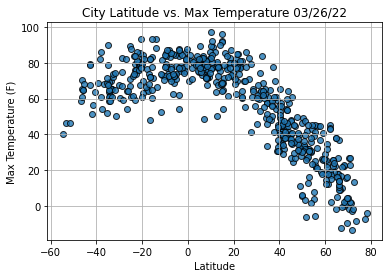

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

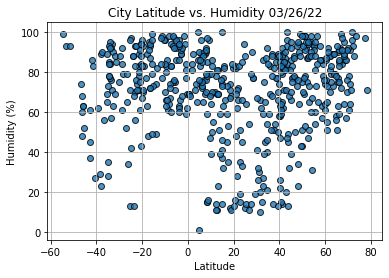

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

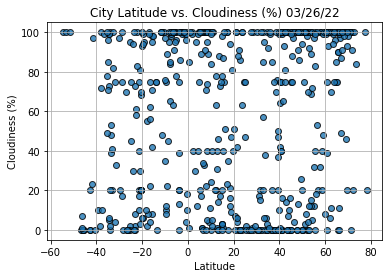

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

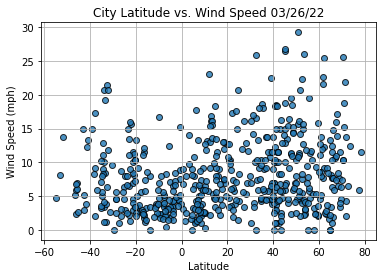

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()